In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("Bank_Churn.csv")
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data=df.drop(["CustomerId","Surname","Exited"],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
obj_cols=data.select_dtypes("object").columns
for col in obj_cols:
    from sklearn.preprocessing import LabelEncoder
    la=LabelEncoder()
    data[col]=la.fit_transform(data[col])

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


## Apply PCA

Text(0, 0.5, 'cumulative explained variance')

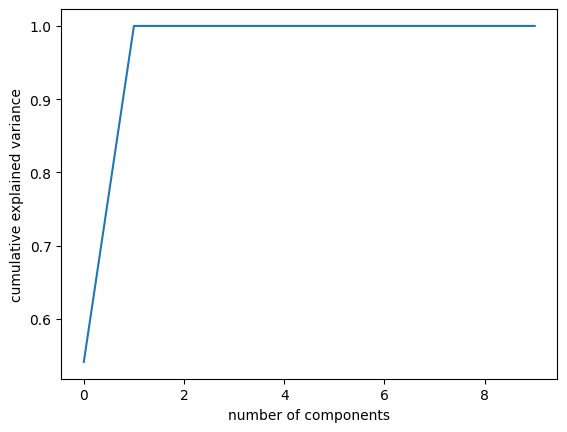

In [6]:
from sklearn.decomposition import PCA
pca=PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

#### 2 components ought to be enough to cover all the features. Apply PCA with 2 components.

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(data)
print("Top 2 components:\n",X_pca)

Top 2 components:
 [[-76157.14598031   7194.7616391 ]
 [  8266.91041411  11846.1056215 ]
 [ 83998.63333719   7340.13343604]
 ...
 [-80759.55513009 -51889.55592413]
 [ -1965.6062396   -7070.42405252]
 [ 48687.71619761 -65879.53097992]]


#### Apply K-means cluster 

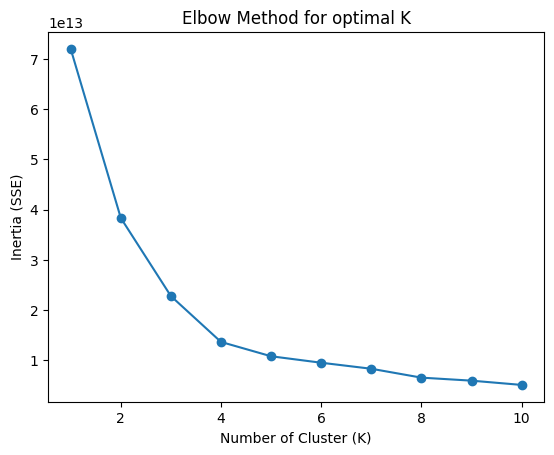

In [8]:
from sklearn.cluster import KMeans
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=2025)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse,marker="o")    
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for optimal K")
plt.show()

#### Look for the optimal number of clusters.

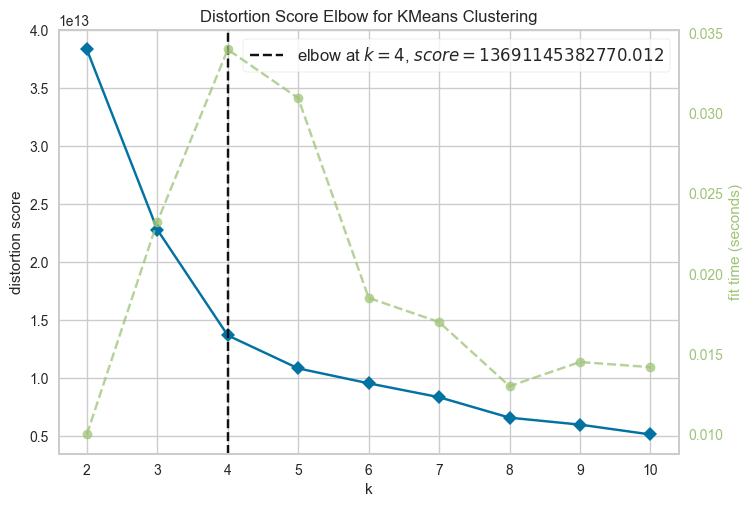

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M=KElbowVisualizer(KMeans(random_state=2025),k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

#### Fit Model

In [10]:
kmeans=KMeans(n_clusters=4,random_state=2025)
kmeans.fit(X_pca)
labels=kmeans.labels_

C:\Users\Kun Bi\AppData\Local\Temp\ipykernel_26580\2597548797.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


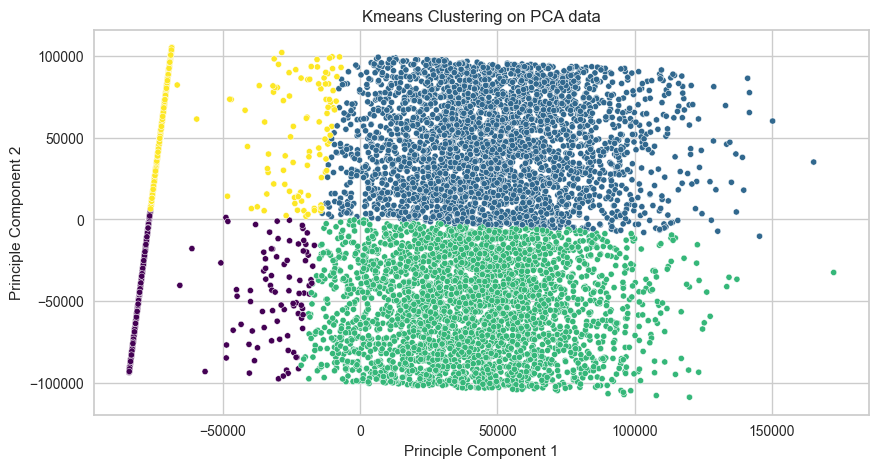

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],c=labels,cmap="viridis",s=20)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Kmeans Clustering on PCA data")
plt.legend()
plt.show()

In [12]:
data["Clusters"]=labels
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Clusters
0,619,0,0,42,2,0.00,1,1,1,101348.88,3
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,2


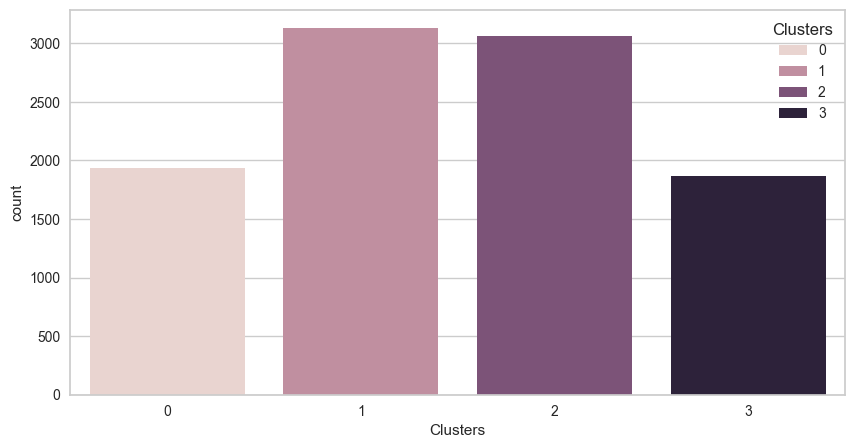

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Clusters,hue=data.Clusters)
plt.show()

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Clusters
0,619,0,0,42,2,0.00,1,1,1,101348.88,3
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,2


In [15]:
a=data.groupby("Clusters")[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]].mean()
a.style.background_gradient(axis=0)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Clusters,,,,,,
0,650.109617,38.523785,5.053775,2266.989514,1.769390,50347.410181
1,650.853674,38.974441,5.002875,121972.558546,1.402236,149709.250067
2,651.647750,39.408023,4.962492,121880.278643,1.368558,50456.026298
3,648.583957,38.448128,5.069519,2682.081599,1.762032,149862.234321


In [16]:
df["Labels"]=labels

In [17]:
df["Cluster_labels"]=df["Labels"].map({0:"low_balance_low_salary",1:"high_balance_high_salary",2:"high_balance_low_salary",3:"low_balance_high_salary"})
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Labels,Cluster_labels
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3,low_balance_high_salary
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,high_balance_high_salary
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,high_balance_high_salary
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,low_balance_low_salary
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,high_balance_low_salary


In [18]:
pca_df=pd.DataFrame(X_pca)
pca_df["Cluster_labels"]=df["Cluster_labels"]
pca_df

,0,1,Cluster_labels
0,-76157.145980,7194.761639,low_balance_high_salary
1,8266.910414,11846.105621,high_balance_high_salary
2,83998.633337,7340.133436,high_balance_high_salary
3,-76741.325975,-304.770459,low_balance_low_salary
4,47245.526441,-24749.993710,high_balance_low_salary
...,...,...,...
9995,-76551.522564,2131.858090,low_balance_low_salary
9996,-18933.550281,3089.246951,low_balance_high_salary
9997,-80759.555130,-51889.555924,low_balance_low_salary
9998,-1965.606240,-7070.424053,high_balance_low_salary


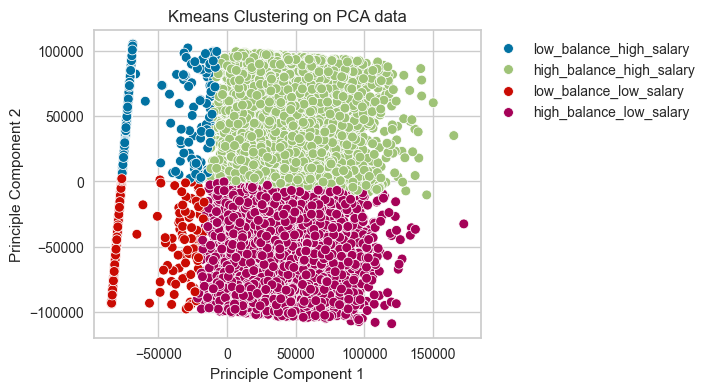

In [19]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=pca_df[0],y=pca_df[1],hue=pca_df["Cluster_labels"],s=50)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Kmeans Clustering on PCA data")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [20]:
a=df.groupby("Cluster_labels")[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]].mean()
a.style.background_gradient(axis=0)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Cluster_labels,,,,,,
high_balance_high_salary,650.853674,38.974441,5.002875,121972.558546,1.402236,149709.250067
high_balance_low_salary,651.647750,39.408023,4.962492,121880.278643,1.368558,50456.026298
low_balance_high_salary,648.583957,38.448128,5.069519,2682.081599,1.762032,149862.234321
low_balance_low_salary,650.109617,38.523785,5.053775,2266.989514,1.769390,50347.410181


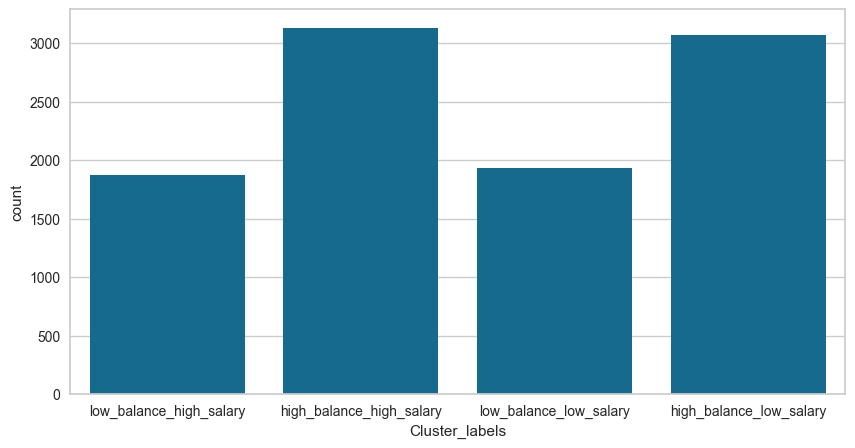

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Cluster_labels")
plt.show()

In [22]:
df[["Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]]=df[["Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]].astype("object")

In [23]:
obj_cols=df.drop(["CustomerId","Surname","Labels","Cluster_labels"],axis=1).select_dtypes("object").columns
num_cols=df.drop(["CustomerId","Surname","Labels","Cluster_labels"],axis=1).select_dtypes("number").columns

In [32]:
for col in obj_cols:
    a=df.groupby([col,"Cluster_labels"]).CustomerId.count().unstack().T
    print(a)
    print("---------------")
    

Geography                 France  Germany  Spain
Cluster_labels                                  
high_balance_high_salary    1256     1245    629
high_balance_low_salary     1250     1208    608
low_balance_high_salary     1232       32    606
low_balance_low_salary      1276       24    634
---------------
Gender                    Female  Male
Cluster_labels                        
high_balance_high_salary    1446  1684
high_balance_low_salary     1353  1713
low_balance_high_salary      874   996
low_balance_low_salary       870  1064
---------------
Tenure                     0    1    2    3    4    5    6    7    8    9   \
Cluster_labels                                                               
high_balance_high_salary  143  355  306  294  303  319  279  340  319  323   
high_balance_low_salary   124  312  339  338  303  302  301  285  322  288   
low_balance_high_salary    74  172  196  182  200  198  189  195  198  163   
low_balance_low_salary     72  196  207  195  183 

The column is Geography


<Figure size 1000x500 with 0 Axes>

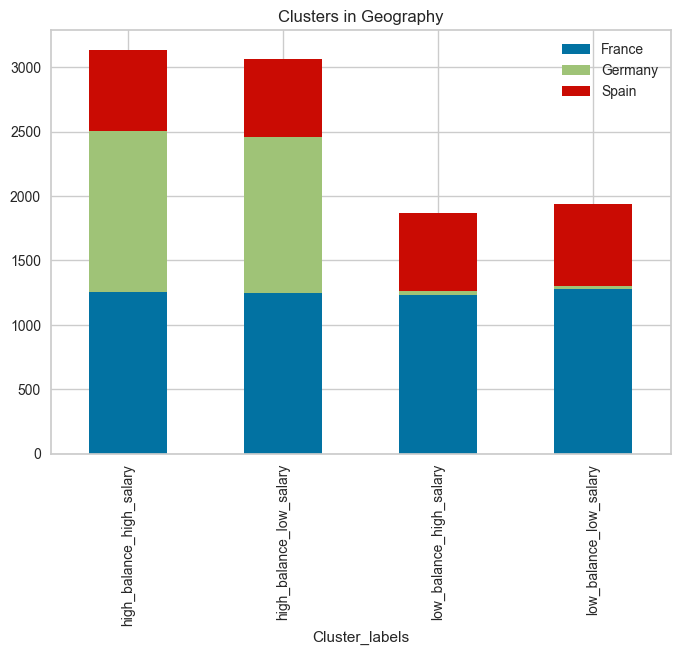

The column is Gender


<Figure size 1000x500 with 0 Axes>

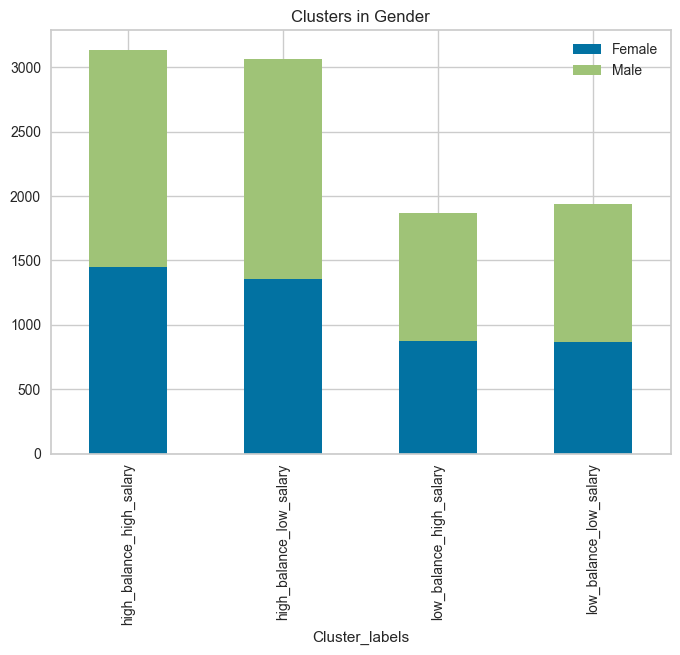

The column is Tenure


<Figure size 1000x500 with 0 Axes>

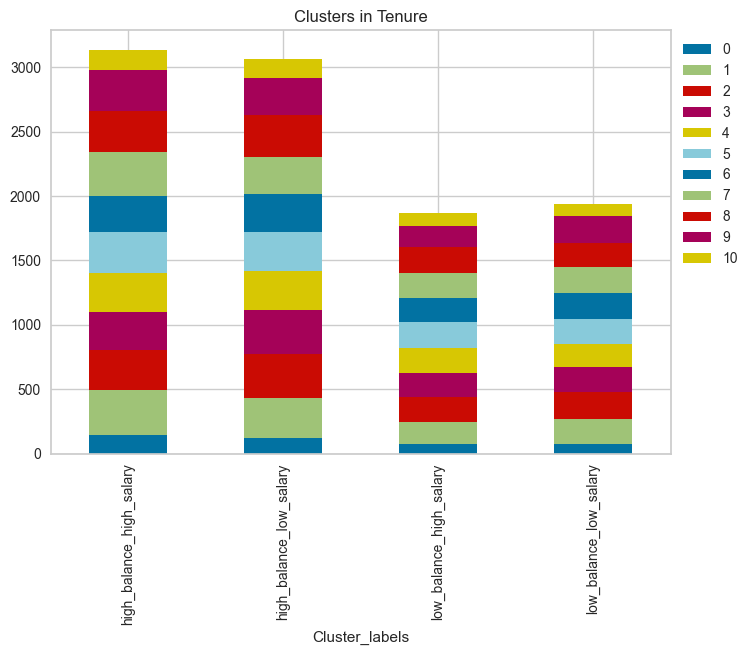

The column is NumOfProducts


<Figure size 1000x500 with 0 Axes>

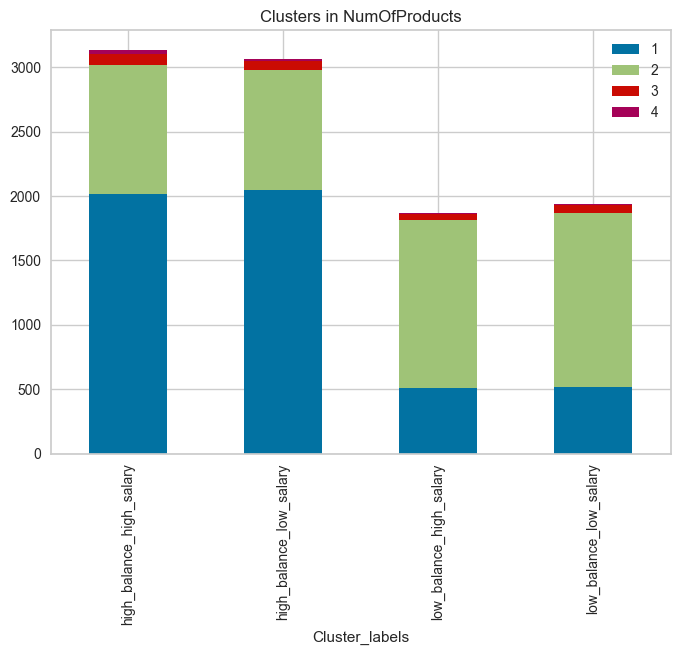

The column is HasCrCard


<Figure size 1000x500 with 0 Axes>

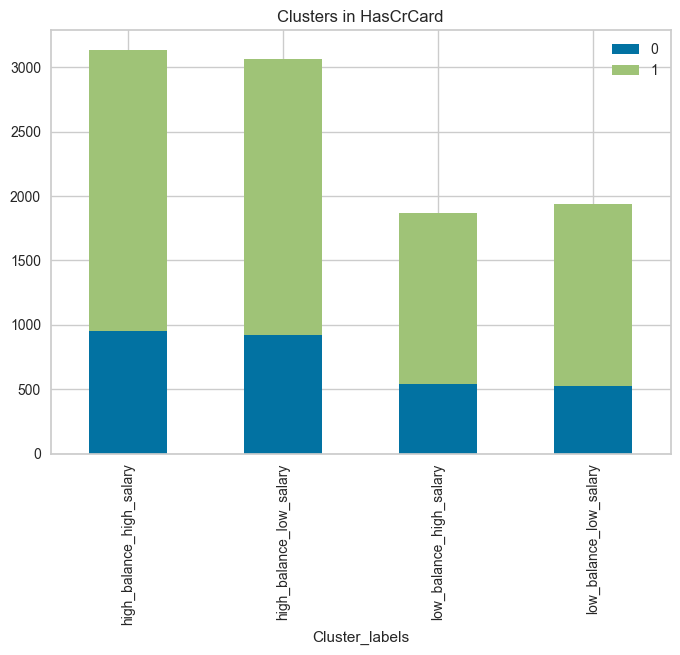

The column is IsActiveMember


<Figure size 1000x500 with 0 Axes>

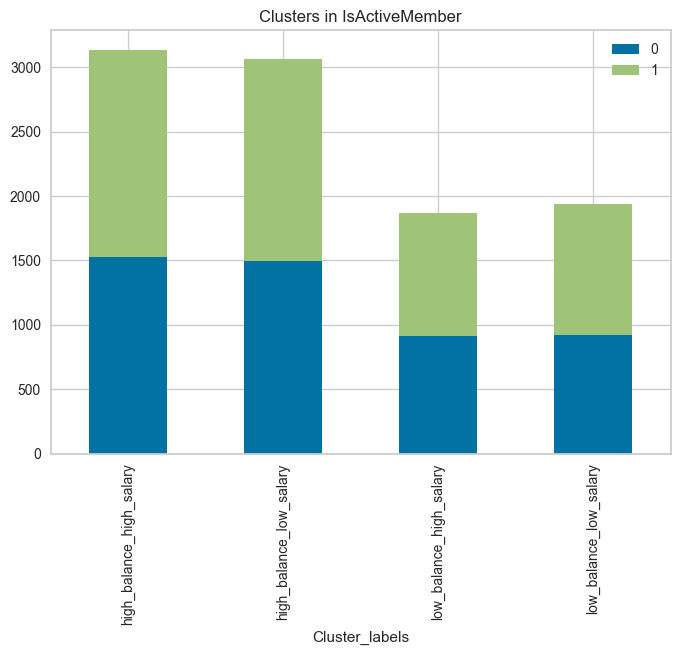

The column is Exited


<Figure size 1000x500 with 0 Axes>

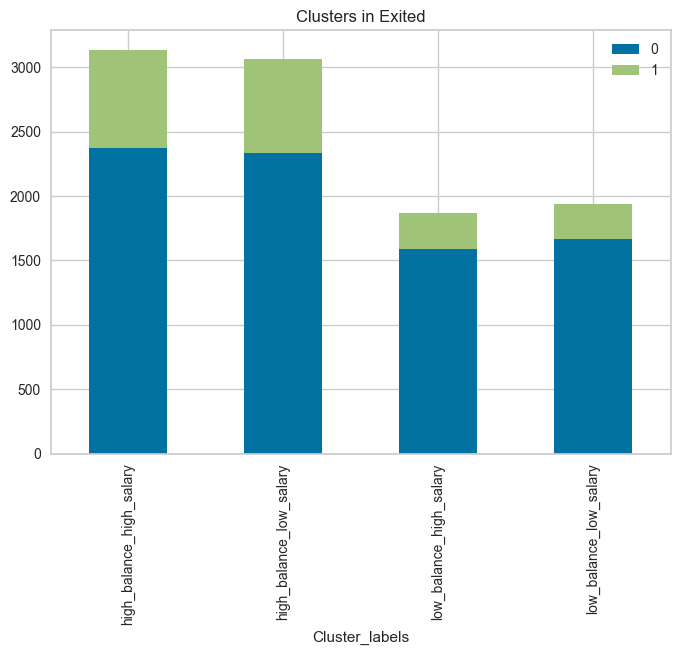

In [25]:
for col in obj_cols:
    print(f"The column is {col}")
    plt.figure(figsize=(10,5))
    df.groupby([col,"Cluster_labels"]).CustomerId.count().unstack().T.plot.bar(stacked=True)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title(f"Clusters in {col}")
    plt.show()

In [26]:
a=df.groupby(["Cluster_labels","Exited"]).CustomerId.count().unstack()
a["total"]=a.sum(axis=1)
a["churn_rate"]=a[1]/a.total
a

Exited,0,1,total,churn_rate
Cluster_labels,,,,
high_balance_high_salary,2370,760,3130,0.242812
high_balance_low_salary,2337,729,3066,0.237769
low_balance_high_salary,1589,281,1870,0.150267
low_balance_low_salary,1667,267,1934,0.138056


#### High value customers are High balance and high salary. However, it also has a high churn rate. 

The column is CreditScore


<Figure size 500x400 with 0 Axes>

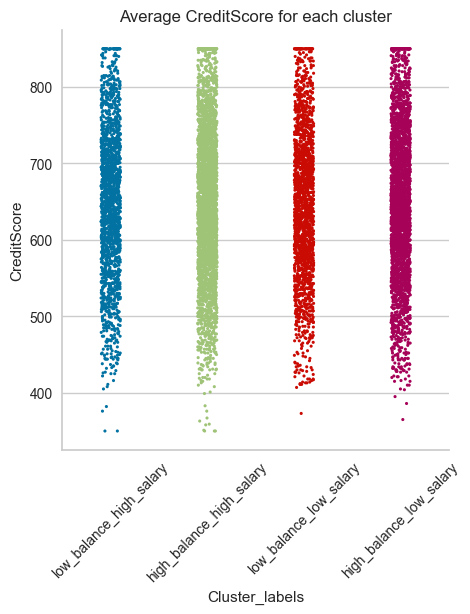

The column is Age


<Figure size 500x400 with 0 Axes>

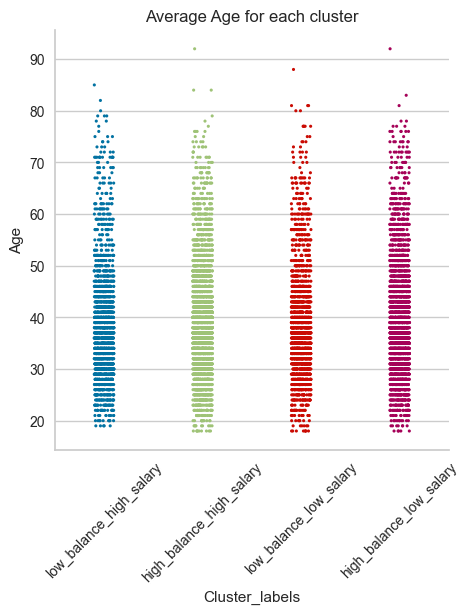

The column is Balance


<Figure size 500x400 with 0 Axes>

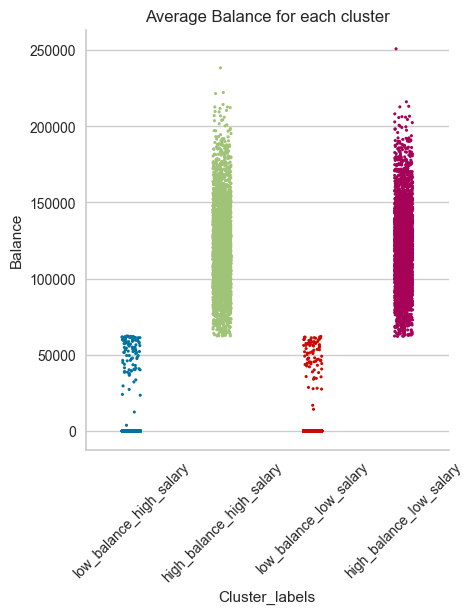

The column is EstimatedSalary


<Figure size 500x400 with 0 Axes>

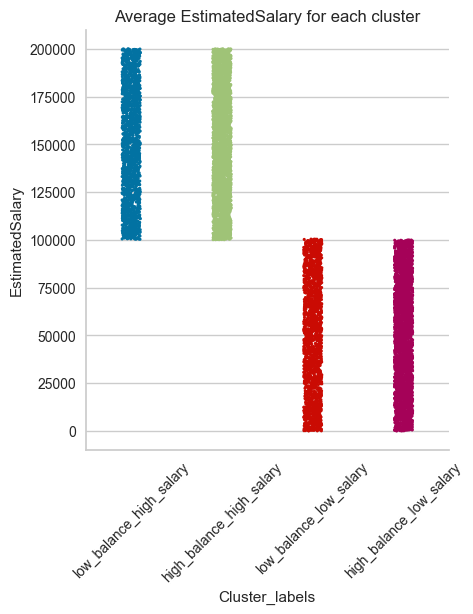

In [27]:
for col in num_cols:
    print(f"The column is {col}")
    plt.figure(figsize=(5,4))
   # a=df.groupby(["Cluster_labels"])[col].mean().reset_index()
    sns.catplot(data=df,x="Cluster_labels",y=f"{col}",s=5,hue="Cluster_labels")
    plt.title(f"Average {col} for each cluster")
    plt.xticks(rotation=45)
    #plt.legend()
    plt.show()
    

#### The best customers are group 1 and group 3 since they are high in Estimated salaries and balances.
#### However, the two groups are also high in churn rate.

#### Try it with DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.01)
dbscan.fit(X_pca)

DBSCAN(eps=0.01)

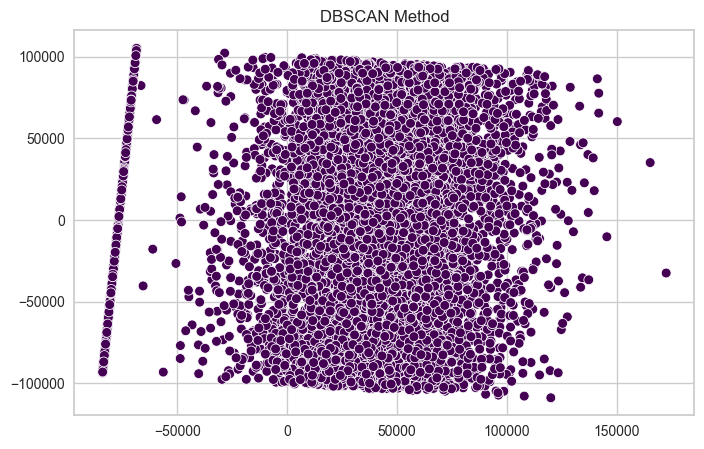

In [29]:
plt.figure(figsize=(8,5))
plt.title("DBSCAN Method")
plt.grid(True)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],c=dbscan.labels_,cmap="viridis",s=50)
plt.show()

In [30]:
d=pd.DataFrame({"labels":dbscan.labels_})